## TypeDict

In [1]:
from typing_extensions import TypedDict
from typing import Literal

class TypeDictState(TypedDict):
    name:str
    game:Literal["cricket","badminton"]

In [19]:
def play_game(state:TypeDictState):
    print("---> Play Game node has been called")
    return{"name": state['name'] + " want's to play "}

def cricket(state:TypeDictState):
    print("---> Cricket node has been called")
    return {"name": state['name'] + "cricket","game":"cricket"}

def badminton(state:TypeDictState):
    print("---> Badminton node has been called")
    return {"name": state['name'] + "badminton","game":"badminton"}

In [20]:
import random
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

In [21]:
import random
def decide_play(state:TypeDictState)-> Literal["cricket","badminton"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"


In [22]:
builder = StateGraph(TypeDictState)
builder.add_node('playgame', play_game)
builder.add_node('cricket',cricket)
builder.add_node('badminton', badminton)

builder.add_edge(START, "playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket", END)
builder.add_edge("badminton", END)

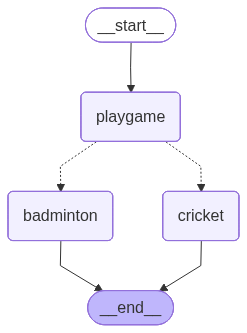

In [23]:
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
graph.invoke({"name":"Cris"})

---> Play Game node has been called
---> Badminton node has been called


{'name': "Cris want's to play badminton", 'game': 'badminton'}

## DataClasses

In [31]:
from dataclasses import dataclass

In [32]:
@dataclass
class DataClassState:
    name:str
    game:Literal["cricket","badminton"]

In [33]:
def play_game(state:DataClassState):
    print("---> Play Game node has been called")
    return{"name": state.name + " want's to play "}

def cricket(state:DataClassState):
    print("---> Cricket node has been called")
    return {"name": state.name + "cricket","game":"cricket"}

def badminton(state:DataClassState):
    print("---> Badminton node has been called")
    return {"name": state.name + "badminton","game":"badminton"}

In [34]:
import random
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

import random
def decide_play(state:DataClassState)-> Literal["cricket","badminton"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

builder = StateGraph(DataClassState)
builder.add_node('playgame', play_game)
builder.add_node('cricket',cricket)
builder.add_node('badminton', badminton)

builder.add_edge(START, "playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket", END)
builder.add_edge("badminton", END)

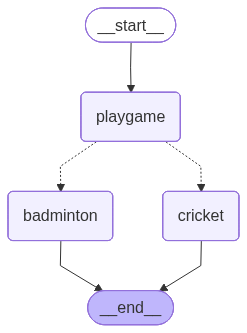

In [35]:
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [40]:
graph.invoke(DataClassState(name="Cris", game="badminton"))

---> Play Game node has been called
---> Badminton node has been called


{'name': "Cris want's to play badminton", 'game': 'badminton'}

## PyDantic

In [41]:
from langgraph.graph import StateGraph, START, END
from pydantic import BaseModel

In [42]:
class State(BaseModel):
    name:str

In [44]:
def example_node(state:State):
    return {"name":"Hey"}

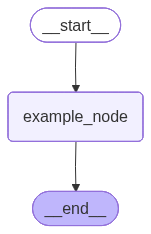

In [46]:
builder = StateGraph(State)

builder.add_node("example_node", example_node)
builder.add_edge(START,"example_node")
builder.add_edge("example_node", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [48]:
graph.invoke({"name":"xd"})

{'name': 'Hey'}

In [49]:
graph.invoke({"name":123})

ValidationError: 1 validation error for State
name
  Input should be a valid string [type=string_type, input_value=123, input_type=int]
    For further information visit https://errors.pydantic.dev/2.9/v/string_type